In [582]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import os
from sys import platform
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy.stats import lognorm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
import sklearn
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np
from sklearn.linear_model import Ridge,Lasso
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score as cvs
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import mutual_info_regression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression #sci-kit for learning, science-kit, sklearn
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.svm import SVR
import os
from sys import platform
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor, XGBRFRegressor
from sklearn.tree import ExtraTreeRegressor, plot_tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
import h2o
from h2o.automl import H2OAutoML

# Instructions

1. Load the `train.csv` file
2. Explore the data, understand it
3. Process it for future training
4. Do train, test, split for your `train.csv` file
5. `fit/train` a model from your cleaned_train_df
-----
5. Load the `train.csv` file
6. Apply the same processing you did to `train.csv` into `test.csv`
7. `predict` the price for that file
8. Only keep the columns you need
9. Export
-----
10. Repeat! 🚀🔥

# Import the csv files

In [583]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [584]:
df_test = pd.read_csv("test.csv")

In [585]:
print(df_train.shape[0])
df_train.sample()

40455


,id,carat,cut,color,clarity,depth,table,x,y,z,price
13033,13033,0.26,Very Good,E,VVS1,61.5,56.0,4.1,4.15,2.53,6.488


In [586]:
print(df_test.shape[0])
df_test.sample()

13485


,id,carat,cut,color,clarity,depth,table,x,y,z
5003,5003,0.51,Premium,G,VVS2,61.7,58.0,5.18,5.13,3.18


# Cleaning, processing, feature selection, etc

In [587]:
df_train.dtypes

id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price      float64
dtype: object

In [588]:
df_train.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [589]:
from sklearn import preprocessing
onehotencoder = preprocessing.OneHotEncoder()

In [590]:
# Create prefixes in columns
labels = ["cut_" + str(a) for a in list(df_train.cut.unique())]
labels

['cut_Premium', 'cut_Ideal', 'cut_Very Good', 'cut_Fair', 'cut_Good']

In [591]:
# Create prefixes in columns
labels_t = ["cut_" + str(a) for a in list(df_test.cut.unique())]
labels_t

['cut_Ideal', 'cut_Premium', 'cut_Fair', 'cut_Good', 'cut_Very Good']

In [592]:
cut = onehotencoder.fit_transform(df_train["cut"].values.reshape(-1,1)).toarray()

In [593]:
cut_t = onehotencoder.fit_transform(df_test["cut"].values.reshape(-1,1)).toarray()

In [594]:
labels_2 = list(df_train.cut.unique())

In [595]:
labels_2t = list(df_test.cut.unique())

In [596]:
cut

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.]])

In [597]:
cut.shape

(40455, 5)

In [598]:
df_train[labels] = pd.DataFrame(cut, index=df_train.index)

In [599]:
df_test[labels] = pd.DataFrame(cut_t, index=df_test.index)

In [600]:
df_train.corr()

,id,carat,depth,table,x,y,z,price,cut_Premium,cut_Ideal,cut_Very Good,cut_Fair,cut_Good
id,1.000000,-0.003045,-0.000405,0.000783,-0.002447,-0.001936,-0.001273,-0.003194,0.000521,0.003087,0.001103,-0.000990,-0.002609
carat,-0.003045,1.000000,0.023585,0.185478,0.974648,0.944419,0.947469,0.920064,0.090120,0.030752,-0.162366,0.119839,0.007610
depth,-0.000405,0.023585,1.000000,-0.299203,-0.029867,-0.033960,0.089474,-0.003292,0.280598,0.134267,-0.020397,-0.198423,0.024716
table,0.000783,0.185478,-0.299203,1.000000,0.200374,0.186788,0.153726,0.162804,0.120931,0.175048,-0.549947,0.341784,0.119229
x,-0.002447,0.974648,-0.029867,0.200374,1.000000,0.967315,0.965496,0.957668,0.079793,0.027264,-0.162517,0.130763,0.002961
y,-0.001936,0.944419,-0.033960,0.186788,0.967315,1.000000,0.941176,0.928909,0.067751,0.028690,-0.151767,0.111127,0.014812
z,-0.001273,0.947469,0.089474,0.153726,0.965496,0.941176,1.000000,0.930014,0.109011,0.041231,-0.157031,0.092791,0.014727
price,-0.003194,0.920064,-0.003292,0.162804,0.957668,0.928909,0.930014,1.000000,0.051609,0.013960,-0.118778,0.099060,0.005368
cut_Premium,0.000521,0.090120,0.280598,0.120931,0.079793,0.067751,0.109011,0.051609,1.000000,-0.055372,-0.143233,-0.102525,-0.093624
cut_Ideal,0.003087,0.030752,0.134267,0.175048,0.027264,0.028690,0.041231,0.013960,-0.055372,1.000000,-0.259003,-0.185391,-0.169296


In [601]:
# Create prefixes in columns
labels = ["clarity_" + str(a) for a in list(df_train.clarity.unique())]
labels

['clarity_SI2',
 'clarity_VVS2',
 'clarity_VS2',
 'clarity_VS1',
 'clarity_SI1',
 'clarity_VVS1',
 'clarity_IF',
 'clarity_I1']

In [602]:
# Create prefixes in columns
labels = ["clarity_" + str(a) for a in list(df_test.clarity.unique())]
labels

['clarity_SI1',
 'clarity_SI2',
 'clarity_VS2',
 'clarity_VS1',
 'clarity_IF',
 'clarity_VVS1',
 'clarity_VVS2',
 'clarity_I1']

In [603]:
clarity = onehotencoder.fit_transform(df_train["clarity"].values.reshape(-1,1)).toarray()

In [604]:
clarity_t = onehotencoder.fit_transform(df_test["clarity"].values.reshape(-1,1)).toarray()

In [605]:
labels_2c = list(df_train.clarity.unique())

In [606]:
labels_2ct = list(df_test.clarity.unique())

In [607]:
clarity_t

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [608]:
clarity.shape

(40455, 8)

In [609]:
df_train[labels] = pd.DataFrame(clarity, index=df_train.index)

In [610]:
df_test[labels] = pd.DataFrame(clarity_t, index=df_test.index)

In [611]:
df_train

,id,carat,cut,color,clarity,depth,table,x,y,z,...,cut_Fair,cut_Good,clarity_SI1,clarity_SI2,clarity_VS2,clarity_VS1,clarity_IF,clarity_VVS1,clarity_VVS2,clarity_I1
0,0,0.30,Premium,D,SI2,62.4,58.0,4.31,4.28,2.68,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,1.01,Ideal,E,VVS2,62.7,56.0,6.42,6.46,4.04,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,0.72,Ideal,F,VS2,61.8,59.0,5.71,5.74,3.54,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,1.08,Very Good,G,SI2,63.2,57.0,6.54,6.50,4.12,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,4,0.36,Premium,G,VS1,62.3,59.0,4.50,4.55,2.82,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,40450,0.42,Premium,D,SI2,62.1,59.0,4.78,4.82,2.98,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
40451,40451,0.53,Premium,G,VS2,62.0,58.0,5.21,5.18,3.22,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
40452,40452,0.80,Good,G,SI2,62.8,58.0,5.86,5.90,3.69,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
40453,40453,1.01,Very Good,F,VS2,61.5,57.0,6.40,6.48,3.96,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [612]:
# Create prefixes in columns
labels = ["color_" + str(a) for a in list(df_train.color.unique())]
labels

['color_D', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J']

In [613]:
# Create prefixes in columns
labels_t = ["color_" + str(a) for a in list(df_test.color.unique())]
labels_t

['color_I', 'color_D', 'color_E', 'color_H', 'color_G', 'color_F', 'color_J']

In [614]:
color = onehotencoder.fit_transform(df_train["color"].values.reshape(-1,1)).toarray()

In [615]:
color_t = onehotencoder.fit_transform(df_test["color"].values.reshape(-1,1)).toarray()

In [616]:
labels_2co = list(df_train.color.unique())

In [617]:
labels_2cot = list(df_test.color.unique())

In [618]:
color

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [619]:
color.shape

(40455, 7)

In [620]:
color

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [621]:
df_train[labels] = pd.DataFrame(color, index=df_train.index)

In [622]:
df_test[labels] = pd.DataFrame(color_t, index=df_test.index)

In [623]:
columns_to_drop = ["x", "y", "z","table","depth","cut","color","clarity"]

In [624]:
columns_to_drop = ["x", "y", "z","table","depth","cut","color","clarity"]

In [625]:
df_train.drop(columns_to_drop, inplace=True, axis=1)

In [626]:
df_test.drop(columns_to_drop, inplace=True, axis=1)

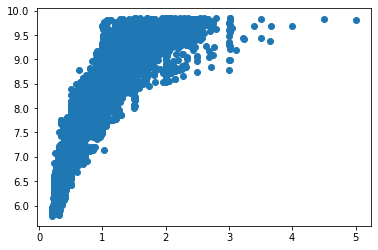

In [627]:
x_train = df_train["carat"]
y_train = df_train["price"]
plt.scatter(x_train,y_train)

In [628]:
df_train.corr()

,id,carat,price,cut_Premium,cut_Ideal,cut_Very Good,cut_Fair,cut_Good,clarity_SI1,clarity_SI2,...,clarity_VVS1,clarity_VVS2,clarity_I1,color_D,color_E,color_F,color_G,color_H,color_I,color_J
id,1.000000,-0.003045,-0.003194,0.000521,0.003087,0.001103,-0.000990,-0.002609,0.004912,0.007584,...,0.001093,-0.001547,0.006159,0.005775,-0.006123,0.004364,-0.004800,0.003528,0.006925,-0.011787
carat,-0.003045,1.000000,0.920064,0.090120,0.030752,-0.162366,0.119839,0.007610,0.121181,-0.113130,...,-0.039891,-0.169408,-0.136539,-0.111542,-0.144088,-0.058136,-0.024423,0.097673,0.162068,0.183083
price,-0.003194,0.920064,1.000000,0.051609,0.013960,-0.118778,0.099060,0.005368,0.028456,-0.068607,...,-0.012298,-0.124411,-0.080940,-0.062971,-0.102507,-0.009570,0.007485,0.051500,0.077958,0.085573
cut_Premium,0.000521,0.090120,0.051609,1.000000,-0.055372,-0.143233,-0.102525,-0.093624,0.181259,-0.027106,...,-0.027412,-0.040334,-0.029270,-0.011198,-0.015057,0.006328,-0.005338,0.011595,0.003907,0.017600
cut_Ideal,0.003087,0.030752,0.013960,-0.055372,1.000000,-0.259003,-0.185391,-0.169296,0.018998,-0.035130,...,-0.023874,-0.036349,-0.038206,0.005392,0.006325,0.008171,-0.023388,-0.008244,0.006163,0.014597
cut_Very Good,0.001103,-0.162366,-0.118778,-0.143233,-0.259003,1.000000,-0.479556,-0.437922,-0.051189,0.103814,...,0.016736,0.088689,0.074745,0.014426,-0.004566,-0.000306,0.037287,-0.022474,-0.005169,-0.037624
cut_Fair,-0.000990,0.119839,0.099060,-0.102525,-0.185391,-0.479556,1.000000,-0.313460,0.006679,-0.054155,...,0.023598,-0.057387,-0.060618,-0.016267,-0.015542,-0.011911,-0.000017,0.029864,0.005829,0.015440
cut_Good,-0.002609,0.007610,0.005368,-0.093624,-0.169296,-0.437922,-0.313460,1.000000,-0.033812,-0.030185,...,-0.016767,-0.002731,0.013855,0.000900,0.023450,0.004618,-0.025568,-0.003866,-0.005878,0.010866
clarity_SI1,0.004912,0.121181,0.028456,0.181259,0.018998,-0.051189,0.006679,-0.033812,1.000000,-0.021553,...,-0.064135,-0.032145,-0.037601,-0.024830,-0.015288,0.008260,-0.002602,0.023756,0.005920,0.007633
clarity_SI2,0.007584,-0.113130,-0.068607,-0.027106,-0.035130,0.103814,-0.054155,-0.030185,-0.021553,1.000000,...,-0.099741,-0.049991,-0.058475,-0.046833,-0.043731,0.017558,0.075740,0.008454,-0.011131,-0.021168


<AxesSubplot:xlabel='carat'>

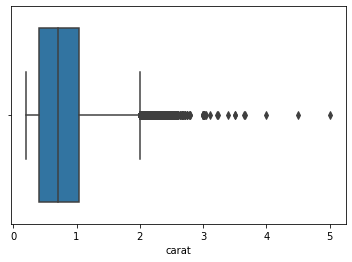

In [629]:
sns.boxplot(df_train.carat)

<AxesSubplot:xlabel='carat', ylabel='Count'>

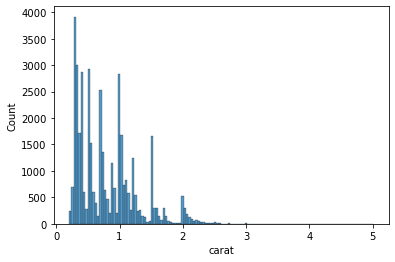

In [630]:
sns.histplot(df_train.carat)

In [631]:
df_train=df_train[df_train["carat"]<=2]

In [632]:
df_test.sample()

,id,carat,cut_Premium,cut_Ideal,cut_Very Good,cut_Fair,cut_Good,clarity_SI1,clarity_SI2,clarity_VS2,...,clarity_VVS1,clarity_VVS2,clarity_I1,color_D,color_E,color_F,color_G,color_H,color_I,color_J
649,649,0.63,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [633]:
df_train.sample()

,id,carat,price,cut_Premium,cut_Ideal,cut_Very Good,cut_Fair,cut_Good,clarity_SI1,clarity_SI2,...,clarity_VVS1,clarity_VVS2,clarity_I1,color_D,color_E,color_F,color_G,color_H,color_I,color_J
9339,9339,1.01,8.487,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


<AxesSubplot:xlabel='carat', ylabel='Count'>

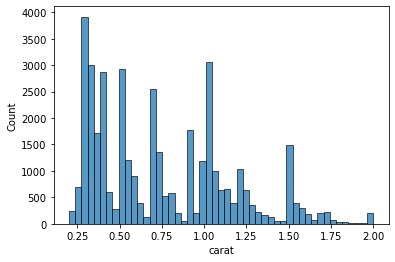

In [634]:
sns.histplot(df_train.carat)

In [635]:
df_train.columns

Index(['id', 'carat', 'price', 'cut_Premium', 'cut_Ideal', 'cut_Very Good',
       'cut_Fair', 'cut_Good', 'clarity_SI1', 'clarity_SI2', 'clarity_VS2',
       'clarity_VS1', 'clarity_IF', 'clarity_VVS1', 'clarity_VVS2',
       'clarity_I1', 'color_D', 'color_E', 'color_F', 'color_G', 'color_H',
       'color_I', 'color_J'],
      dtype='object')

In [636]:
results = smf.ols('price ~ carat + cut_Premium + cut_Ideal + cut_Fair + cut_Good + clarity_SI2 + clarity_VVS2 + clarity_VS2 + clarity_VS1 + clarity_SI1 + clarity_VVS1 + clarity_IF + clarity_I1 + color_D + color_E + color_F + color_G + color_H + color_I + color_J', data = df_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                 2.664e+04
Date:                Mon, 22 Aug 2022   Prob (F-statistic):               0.00
Time:                        11:34:21   Log-Likelihood:                -3767.1
No. Observations:               39005   AIC:                             7572.
Df Residuals:                   38986   BIC:                             7735.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        4.5791      0.003   1511.144      0.000       4.573       4.585
carat            2.4892      0.004    671.222      0.000       2.482       2.496
cut_Premium     -0.0940      0.008    -11.115      0.000      -0.111      -0.077
cut_Ideal       -0.0538      0.005    -10.727      0.000      -0.064      -0.044
cut_Fair        -0.0341      0.004     -9.742      0.000      -0.041      -0.027
cut_Good        -0.0415      0.004    -11.570      0.000      -0.049      -0.034
clarity_SI2      0.8878      0.007    129.782      0.000       0.874       0.901
clarity_VVS2     0.7993      0.005    163.777      0.000       0.790       0.809
clarity_VS2      0.5174      0.003    162.862      0.000       0.511       0.524
clarity_VS1      0.3693      0.004     98.393      0.000       0.362       0.377
clarity_SI1     -0.0661      0.011     -5.915      0.000      -0.088      -0.044
clarity_VVS1     0.6230      0.003    197.488      0.000       0.617       0.629
clarity_IF       0.6847      0.004    190.565      0.000       0.678       0.692
clarity_I1       0.7637      0.004    177.089      0.000       0.755       0.772
color_D          0.8697      0.004    244.954      0.000       0.863       0.877
color_E          0.8124      0.003    267.027      0.000       0.806       0.818
color_F          0.7964      0.003    260.200      0.000       0.790       0.802
color_G          0.7222      0.003    247.434      0.000       0.717       0.728
color_H          0.5956      0.003    178.178      0.000       0.589       0.602
color_I          0.4623      0.004    112.003      0.000       0.454       0.470
color_J          0.3205      0.006     56.456      0.000       0.309       0.332
==============================================================================
Omnibus:                     2959.357   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4033.603
Skew:                          -0.654   Prob(JB):                         0.00
Kurtosis:                       3.879   Cond. No.                     1.27e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.01e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [637]:
results = smf.ols('price ~ carat', data = df_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                 2.910e+05
Date:                Mon, 22 Aug 2022   Prob (F-statistic):               0.00
Time:                        11:34:23   Log-Likelihood:                -12587.
No. Observations:               39005   AIC:                         2.518e+04
Df Residuals:                   39003   BIC:                         2.520e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0213      0.004   1687.066      0.000       6.014       6.028
carat          2.2692      0.004    539.466      0.000       2.261       2.277
==============================================================================
Omnibus:                      831.666   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1249.946
Skew:                          -0.231   Prob(JB):                    3.78e-272
Kurtosis:                       3.745   Cond. No.                         4.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Normalize carat

In [638]:
from sklearn.preprocessing import MinMaxScaler

In [639]:
min_max = MinMaxScaler()

In [640]:
df_train.carat.value_counts()

0.30    1964
0.31    1708
1.01    1645
0.70    1524
0.32    1393
        ... 
1.99       2
1.96       2
1.94       2
1.92       1
1.85       1
Name: carat, Length: 181, dtype: int64

In [641]:
df_test.carat.value_counts()

0.30    640
1.01    597
0.31    541
0.70    457
0.32    447
       ... 
3.05      1
2.34      1
2.41      1
2.75      1
2.39      1
Name: carat, Length: 237, dtype: int64

In [642]:
df_train["carat"] = min_max.fit_transform(df_train["carat"].values.reshape(-1, 1))

In [643]:
df_test["carat"] = min_max.fit_transform(df_test["carat"].values.reshape(-1, 1))

## Train test split - dummy cut, color, clarity

In [644]:
from sklearn.model_selection import train_test_split

In [651]:
X = df_train.iloc[:,:-1]
y = df_train['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [646]:
# I assign the variables train test split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [652]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [653]:
rf = RandomForestRegressor()
xgb = XGBRegressor()
xgbr = XGBRFRegressor()
linreg = LinearRegression()
trees = ExtraTreeRegressor()
knn = KNeighborsRegressor()
gb = GradientBoostingRegressor()
cat = CatBoostRegressor(verbose=0)
regressor = SVR(kernel = 'rbf')


models = [rf, xgb, xgbr, linreg, trees, knn, gb, cat, regressor]

In [654]:
df_test

,id,carat,cut_Premium,cut_Ideal,cut_Very Good,cut_Fair,cut_Good,clarity_SI1,clarity_SI2,clarity_VS2,...,clarity_VVS1,clarity_VVS2,clarity_I1,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,0,0.030534,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0.264631,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,0.371501,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.139949,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.330789,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13480,13480,0.229008,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13481,13481,0.178117,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
13482,13482,0.025445,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
13483,13483,0.267176,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [657]:
#get the prediction with your best model
xgbr = XGBRFRegressor()
model.fit(X_train, y_train)
test_pred = model.predict(df_test)

In [ ]:
print(f'RMSE test: {rmse_test}')

In [658]:
#append test_pred to df_test
df_test["price"]=test_pred

In [659]:
df_test.columns

Index(['id', 'carat', 'cut_Premium', 'cut_Ideal', 'cut_Very Good', 'cut_Fair',
       'cut_Good', 'clarity_SI1', 'clarity_SI2', 'clarity_VS2', 'clarity_VS1',
       'clarity_IF', 'clarity_VVS1', 'clarity_VVS2', 'clarity_I1', 'color_D',
       'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J',
       'price'],
      dtype='object')

In [660]:
columns_to_drop = [ 'carat', 'cut_Premium', 'cut_Ideal', 'cut_Very Good', 'cut_Fair',
       'cut_Good', 'clarity_SI1', 'clarity_SI2', 'clarity_VS2', 'clarity_VS1',
       'clarity_IF', 'clarity_VVS1', 'clarity_VVS2', 'clarity_I1', 'color_D',
       'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J']

In [661]:
df_test.drop(columns_to_drop, inplace=True, axis=1)

In [662]:
df_test

,id,price
0,0,7.753213
1,1,7.753200
2,2,7.753188
3,3,7.753177
4,4,7.753226
...,...,...
13480,13480,7.711643
13481,13481,7.711651
13482,13482,7.711647
13483,13483,7.711658


In [663]:
df_test.to_csv("my_submission.csv", index=False)

In [430]:
pwd

'/Users/Juliana/Desktop/Ironhack/Projects/Diamond-Prediction-Machine-Learning'

In [ ]:
#append test_pred to df_test
#keep only id and test_pred - with the name specified in the file

In [656]:
train_preds = pd.DataFrame()

test_preds = pd.DataFrame()

eval_train = pd.DataFrame()

eval_test = pd.DataFrame()

for model in models:
    name = str(model)[:14]
    print(f'\nTraining ..... {name}\n')
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    rmse_train = mean_squared_error(y_train, train_pred, squared=False)
    test_pred = model.predict(X_test)
    rmse_test = mean_squared_error(y_test, test_pred, squared=False)
    
    model.fit(X,y)
    
    
    
    train_preds[f'{name}'] = train_pred
    test_preds[f'{name}'] = test_pred
    
    eval_train[f'{name}'] = rmse_train
    eval_test[f'{name}'] = rmse_test
    
    print(f'RMSE {name} n train: {rmse_train}')
    print(f'RMSE de {name} en test: {rmse_test}')
    



Training ..... RandomForestRe

RMSE RandomForestRe n train: 0.0001096334661190533
RMSE de RandomForestRe en test: 0.00011026885619266231

Training ..... XGBRegressor(b

RMSE XGBRegressor(b n train: 0.0017245589108442615
RMSE de XGBRegressor(b en test: 0.001776239845397131

Training ..... XGBRFRegressor

RMSE XGBRFRegressor n train: 0.018084646743688503
RMSE de XGBRFRegressor en test: 0.01703300877001788

Training ..... LinearRegressi

RMSE LinearRegressi n train: 1.2712579236387534e-11
RMSE de LinearRegressi en test: 1.2673720343743796e-11

Training ..... ExtraTreeRegre

RMSE ExtraTreeRegre n train: 1.4868454132463266e-15
RMSE de ExtraTreeRegre en test: 0.00027701808419509195

Training ..... KNeighborsRegr

RMSE KNeighborsRegr n train: 0.7880788713598806
RMSE de KNeighborsRegr en test: 0.9968169427178454

Training ..... GradientBoosti

RMSE GradientBoosti n train: 0.007217931234786538
RMSE de GradientBoosti en test: 0.007290475931573209

Training ..... <catboost.core

RMSE <catboost.c

In [401]:
#df_test_cleaned = df_test.select_dtypes(exclude='object')
#print(df_test_cleaned.shape[0])
#df_test_cleaned.sample()

13485


,id,carat,depth,table,x,y,z,cut_Premium,cut_Ideal,cut_Very Good,...,clarity_VVS1,clarity_VVS2,clarity_I1,color_D,color_E,color_F,color_G,color_H,color_I,color_J
9494,9494,0.414758,60.5,59.0,7.99,7.89,4.8,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [402]:
test_pred

array([7.73912744, 7.72630587, 7.71813907, ..., 7.69840899, 7.69875571,
       7.70540805])

In [ ]:
id

In [178]:
X_train.sample()

,id,carat,price,cut_Premium,cut_Ideal,cut_Very Good,cut_Fair,cut_Good,clarity_SI2,clarity_VVS2,...,clarity_SI1,clarity_VVS1,clarity_IF,clarity_I1,color_D,color_E,color_F,color_G,color_H,color_I
17299,17299,0.511111,8.875,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [189]:
#df_test1 = df_test.drop(columns='price')
#df_test1.sample()

KeyError: "['price'] not found in axis"

In [180]:
#y_pred = rf.predict(df_test)
#y_pred

# Just for feedback
#if platform == "darwin":
    os.system("say -v Monica ayam don predictin")

In [181]:
df_test_cleaned['price'] = y_pred # Adding the predicted price
df_for_submission = df_test_cleaned[["id", "price"]] # Modifying for subnmission

In [183]:
df_for_submission.shape

(13485, 2)

In [186]:
df_for_submission.to_csv("my_submission.csv", index=False)

# Just for feedback
if platform == "darwin":
    os.system("say -v Monica redi for submission")

In [ ]:
y_pred = rf.predict(df_train)
y_pred

# Just for feedback
if platform == "darwin":
    os.system("say -v Monica ayam don predictin")

In [ ]:
rmse_test = mean_squared_error(y_test, test_pred, squared=False)

In [109]:
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

# Just for feedback
if platform == "darwin":
    os.system("say -v Monica ayam don treinin")

In [110]:
y_pred = rf.predict(X_train)
y_pred

# Just for feedback
if platform == "darwin":
    os.system("say -v Monica ayam don predictin")

In [218]:
#color
df_train.color.value_counts()

G    8410
E    7368
F    7182
H    6203
D    5100
I    4070
J    2122
Name: color, dtype: int64

In [68]:
dict_for_color = {
    "D":7,
    "E":6,
    "F":5,
    "G":4,
    "H":3,
    "I":2,
    "J":1,
    
}

In [69]:
#clarity
df_train.clarity.value_counts()
    

SI1     9779
VS2     9259
SI2     6921
VS1     6079
VVS2    3745
VVS1    2807
IF      1312
I1       553
Name: clarity, dtype: int64

In [70]:
#clarity
dict_clarity = {
    "IF":5,
    "VVS1":4,
    "VVS2":4,
    "VS1":3,
    "VS2":3,
    "SI1":2,
    "SI2":2,
    "I1":1,
    
}

In [71]:
df_train.cut = df_train.cut.map(dict_for_cut) # Map on pandas is different form map in python
df_train

,id,carat,cut,color,clarity,depth,table,x,y,z,...,cut_Premium,cut_Ideal,cut_Very Good,cut_Fair,cut_Good,clarity_Premium,clarity_Ideal,clarity_Very Good,clarity_Fair,clarity_Good
0,0,0.30,4,D,SI2,62.4,58.0,4.31,4.28,2.68,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,1.01,5,E,VVS2,62.7,56.0,6.42,6.46,4.04,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,0.72,5,F,VS2,61.8,59.0,5.71,5.74,3.54,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,1.08,3,G,SI2,63.2,57.0,6.54,6.50,4.12,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,4,0.36,4,G,VS1,62.3,59.0,4.50,4.55,2.82,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,40450,0.42,4,D,SI2,62.1,59.0,4.78,4.82,2.98,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
40451,40451,0.53,4,G,VS2,62.0,58.0,5.21,5.18,3.22,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
40452,40452,0.80,2,G,SI2,62.8,58.0,5.86,5.90,3.69,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
40453,40453,1.01,3,F,VS2,61.5,57.0,6.40,6.48,3.96,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [72]:
df_train.color = df_train.color.map(dict_for_color) # Map on pandas is different form map in python
df_train

,id,carat,cut,color,clarity,depth,table,x,y,z,...,cut_Premium,cut_Ideal,cut_Very Good,cut_Fair,cut_Good,clarity_Premium,clarity_Ideal,clarity_Very Good,clarity_Fair,clarity_Good
0,0,0.30,4,7,SI2,62.4,58.0,4.31,4.28,2.68,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,1.01,5,6,VVS2,62.7,56.0,6.42,6.46,4.04,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,0.72,5,5,VS2,61.8,59.0,5.71,5.74,3.54,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,1.08,3,4,SI2,63.2,57.0,6.54,6.50,4.12,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,4,0.36,4,4,VS1,62.3,59.0,4.50,4.55,2.82,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,40450,0.42,4,7,SI2,62.1,59.0,4.78,4.82,2.98,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
40451,40451,0.53,4,4,VS2,62.0,58.0,5.21,5.18,3.22,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
40452,40452,0.80,2,4,SI2,62.8,58.0,5.86,5.90,3.69,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
40453,40453,1.01,3,5,VS2,61.5,57.0,6.40,6.48,3.96,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [73]:
df_train.clarity = df_train.clarity.map(dict_clarity) # Map on pandas is different form map in python
df_train

,id,carat,cut,color,clarity,depth,table,x,y,z,...,cut_Premium,cut_Ideal,cut_Very Good,cut_Fair,cut_Good,clarity_Premium,clarity_Ideal,clarity_Very Good,clarity_Fair,clarity_Good
0,0,0.30,4,7,2,62.4,58.0,4.31,4.28,2.68,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,1.01,5,6,4,62.7,56.0,6.42,6.46,4.04,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,0.72,5,5,3,61.8,59.0,5.71,5.74,3.54,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,1.08,3,4,2,63.2,57.0,6.54,6.50,4.12,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,4,0.36,4,4,3,62.3,59.0,4.50,4.55,2.82,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,40450,0.42,4,7,2,62.1,59.0,4.78,4.82,2.98,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
40451,40451,0.53,4,4,3,62.0,58.0,5.21,5.18,3.22,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
40452,40452,0.80,2,4,2,62.8,58.0,5.86,5.90,3.69,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
40453,40453,1.01,3,5,3,61.5,57.0,6.40,6.48,3.96,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [220]:
df_train.dtypes

id                 int64
carat            float64
cut               object
color             object
clarity           object
depth            float64
table            float64
x                float64
y                float64
z                float64
price            float64
cut_Premium      float64
cut_Ideal        float64
cut_Very Good    float64
cut_Fair         float64
cut_Good         float64
color_D          float64
color_E          float64
color_F          float64
color_G          float64
color_H          float64
color_I          float64
color_J          float64
dtype: object

In [74]:
df_train.dtypes

id                     int64
carat                float64
cut                    int64
color                  int64
clarity                int64
depth                float64
table                float64
x                    float64
y                    float64
z                    float64
price                float64
cut_Premium          float64
cut_Ideal            float64
cut_Very Good        float64
cut_Fair             float64
cut_Good             float64
clarity_Premium      float64
clarity_Ideal        float64
clarity_Very Good    float64
clarity_Fair         float64
clarity_Good         float64
dtype: object

## Multicollinearity?

In [75]:
#correlation
df_train("carat"cut_Premium").corr()

,id,carat,cut,color,clarity,depth,table,x,y,z,...,cut_Premium,cut_Ideal,cut_Very Good,cut_Fair,cut_Good,clarity_Premium,clarity_Ideal,clarity_Very Good,clarity_Fair,clarity_Good
id,1.000000,-0.003045,-0.000372,0.003016,0.005996,-0.000405,0.000783,-0.002447,-0.001936,-0.001273,...,0.000521,0.003087,0.001103,-0.000990,-0.002609,0.000521,0.003087,0.001103,-0.000990,-0.002609
carat,-0.003045,1.000000,-0.131069,-0.293307,-0.329734,0.023585,0.185478,0.974648,0.944419,0.947469,...,0.090120,0.030752,-0.162366,0.119839,0.007610,0.090120,0.030752,-0.162366,0.119839,0.007610
cut,-0.000372,-0.131069,1.000000,0.017590,0.191480,-0.215352,-0.431195,-0.122895,-0.117832,-0.145396,...,-0.455682,-0.540589,0.800918,0.048550,-0.434846,-0.455682,-0.540589,0.800918,0.048550,-0.434846
color,0.003016,-0.293307,0.017590,1.000000,-0.010327,-0.047839,-0.028516,-0.272222,-0.263498,-0.268702,...,-0.022691,0.001687,0.027645,-0.033660,0.010815,-0.022691,0.001687,0.027645,-0.033660,0.010815
clarity,0.005996,-0.329734,0.191480,-0.010327,1.000000,-0.073636,-0.156452,-0.348836,-0.333370,-0.343239,...,-0.108842,-0.091510,0.200840,-0.106308,-0.017477,-0.108842,-0.091510,0.200840,-0.106308,-0.017477
depth,-0.000405,0.023585,-0.215352,-0.047839,-0.073636,1.000000,-0.299203,-0.029867,-0.033960,0.089474,...,0.280598,0.134267,-0.020397,-0.198423,0.024716,0.280598,0.134267,-0.020397,-0.198423,0.024716
table,0.000783,0.185478,-0.431195,-0.028516,-0.156452,-0.299203,1.000000,0.200374,0.186788,0.153726,...,0.120931,0.175048,-0.549947,0.341784,0.119229,0.120931,0.175048,-0.549947,0.341784,0.119229
x,-0.002447,0.974648,-0.122895,-0.272222,-0.348836,-0.029867,0.200374,1.000000,0.967315,0.965496,...,0.079793,0.027264,-0.162517,0.130763,0.002961,0.079793,0.027264,-0.162517,0.130763,0.002961
y,-0.001936,0.944419,-0.117832,-0.263498,-0.333370,-0.033960,0.186788,0.967315,1.000000,0.941176,...,0.067751,0.028690,-0.151767,0.111127,0.014812,0.067751,0.028690,-0.151767,0.111127,0.014812
z,-0.001273,0.947469,-0.145396,-0.268702,-0.343239,0.089474,0.153726,0.965496,0.941176,1.000000,...,0.109011,0.041231,-0.157031,0.092791,0.014727,0.109011,0.041231,-0.157031,0.092791,0.014727


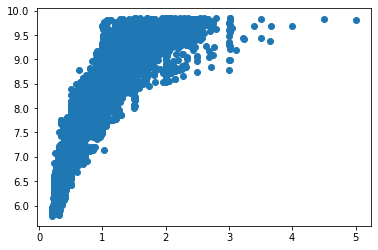

In [157]:
x_train = df_train["carat"]
y_train = df_train["price"]
plt.scatter(x_train,y_train)

In [158]:
columns_to_drop = ["x", "y", "z"]

In [159]:
df_train.drop(columns_to_drop, inplace=True, axis=1)

In [18]:
# Processing is necessary, otherwise we won't be able to fit a model
# For the sake of the example, we'll just drop categorical columns

df_train_cleaned = df_train.select_dtypes(exclude='object')
print(df_train_cleaned.shape[0])
df_train_cleaned

40455


,id,carat,depth,table,x,y,z,price
0,0,0.30,62.4,58.0,4.31,4.28,2.68,6.353
1,1,1.01,62.7,56.0,6.42,6.46,4.04,9.183
2,2,0.72,61.8,59.0,5.71,5.74,3.54,7.983
3,3,1.08,63.2,57.0,6.54,6.50,4.12,8.371
4,4,0.36,62.3,59.0,4.50,4.55,2.82,6.588
...,...,...,...,...,...,...,...,...
40450,40450,0.42,62.1,59.0,4.78,4.82,2.98,6.551
40451,40451,0.53,62.0,58.0,5.21,5.18,3.22,7.382
40452,40452,0.80,62.8,58.0,5.86,5.90,3.69,7.768
40453,40453,1.01,61.5,57.0,6.40,6.48,3.96,8.726


In [100]:
color.shape

NameError: name 'color' is not defined

# Train on train.csv

![](https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/4_train-test-split.jpg)

## Train, test split

In [98]:
X = df_train_cleaned.iloc[:,:-1]
y = df_train_cleaned['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)

NameError: name 'df_train_cleaned' is not defined

## Fit

In [20]:
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

# Just for feedback
if platform == "darwin":
    os.system("say -v Monica ayam don treinin")

-----
-----
-----
-----


# Applying same cleaning & processing to my `test.csv`

In [21]:
df_test_cleaned = df_test.select_dtypes(exclude='object')
print(df_test_cleaned.shape[0])
df_test_cleaned.sample()

13485


,id,carat,depth,table,x,y,z
7915,7915,1.26,62.7,58.0,6.93,6.86,4.32


# Predict on the `test.csv`

In [22]:
y_pred = regressor.predict(df_test_cleaned)
y_pred

# Just for feedback
if platform == "darwin":
    os.system("say -v Monica ayam don predictin")

# DF with two columns

In [23]:
print(df_test_cleaned.shape[0])
df_test_cleaned.sample()

13485


,id,carat,depth,table,x,y,z
2479,2479,1.04,58.6,60.0,6.67,6.63,3.9


In [24]:
df_test_cleaned['price'] = y_pred # Adding the predicted price
df_for_submission = df_test_cleaned[["id", "price"]] # Modifying for subnmission

In [25]:
print(df_for_submission.shape[0])
df_for_submission.sample()

13485


,id,price
12691,12691,7.801002


# Export (index=False)

In [26]:
df_for_submission.to_csv("my_submission.csv", index=False)

# Just for feedback
if platform == "darwin":
    os.system("say -v Monica redi for submission")

In [27]:
pwd

'/Users/Juliana/Desktop/Ironhack/Projects/Diamond-Prediction-Machine-Learning'